# 서울 날씨 트위터를 위한 머신러닝

![서울타워](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/QRCode.png.png)

* Data set: pm2p5c.csv

* Date: 23rd Apr 2019

* Written By Haesung Lee

* AWS-IoT Diagram:

![Image](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/AWS-IoT_Analytics.png)


### S3 myiotstation 버킷에서 pm2p5c.csv 초미세 먼지데이터 가져오기

In [31]:
# create and evaluate an updated autoregressive model
import pandas as pa
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#
# Data sets

In [32]:
#view basic stats information on data
series.describe()

count    35.000000
mean     21.685714
std      15.914794
min       3.000000
25%       8.500000
50%      18.000000
75%      33.000000
max      63.000000
Name: Dust, dtype: float64

In [33]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 

#view top 10 records
series.head(10)

time
2019-04-20    20
2019-04-21    21
2019-04-21    41
2019-04-21    21
2019-04-21    31
2019-04-22    37
2019-04-22    32
2019-04-22    38
2019-04-22    34
2019-04-23    30
Name: Dust, dtype: int64

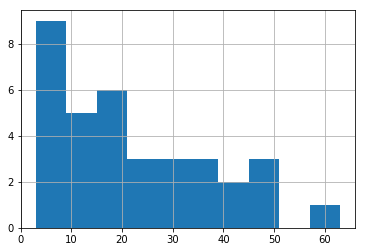

In [34]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

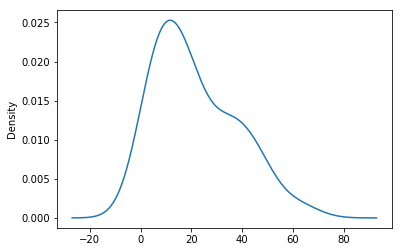

In [35]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
pyplot.show()

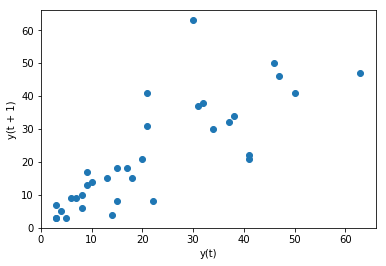

In [36]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [37]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

            t       t+1
t    1.000000  0.805891
t+1  0.805891  1.000000


### Autocorrelation (자기상관도)

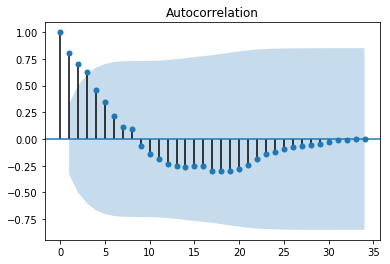

In [38]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series, lags=34)
pyplot.show()

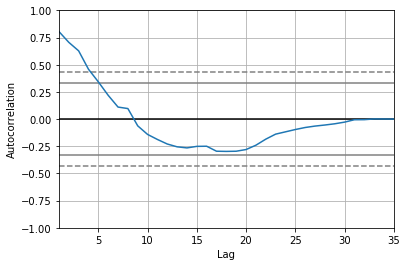

In [39]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

{sensor:30.000000,prediction:36.868843}
{sensor:63.000000,prediction:38.295336}
{sensor:47.000000,prediction:41.722092}
{sensor:46.000000,prediction:48.042836}
{sensor:50.000000,prediction:48.080494}
{sensor:41.000000,prediction:47.277171}
{sensor:22.000000,prediction:56.122334}
{sensor:8.000000,prediction:47.248394}
{sensor:10.000000,prediction:37.402841}
{sensor:14.000000,prediction:31.303013}
{sensor:4.000000,prediction:25.419424}
{sensor:5.000000,prediction:16.639138}
{sensor:3.000000,prediction:9.284652}
{sensor:3.000000,prediction:7.737093}
{sensor:3.000000,prediction:7.935095}
{sensor:7.000000,prediction:4.457086}
{sensor:9.000000,prediction:4.794741}
{sensor:13.000000,prediction:5.555003}
{sensor:15.000000,prediction:7.387235}
{sensor:18.000000,prediction:9.509336}
{sensor:15.000000,prediction:12.833780}
{sensor:8.000000,prediction:14.696294}
{sensor:6.000000,prediction:14.851742}
{sensor:9.000000,prediction:13.348264}
{sensor:17.000000,prediction:13.008920}
{sensor:18.000000,p

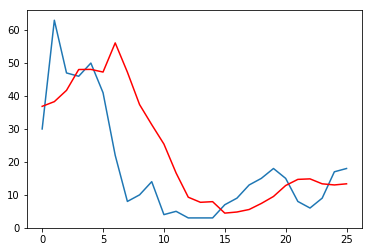

In [58]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
testLength = 26;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (obs, yhat))
rmse = sqrt(mean_squared_error(test, predictions))

print('{TestRMSE:%.3f}' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 9.911


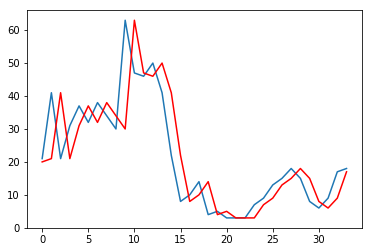

In [55]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('https://s3.amazonaws.com/myiotstation/pm2p5c.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
testLength = 34;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

# END